In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation
### Create flat file

In [31]:
df = pd.read_csv(r"/Users/nmglwr/Documents/GitHub/ML_project_medical/Cancer_Data.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [37]:
# change the data type of diagnosis
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df

/var/folders/kt/vryl5t_x6vz2mn_mbf124k0h0000gn/T/ipykernel_78059/3996988436.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.14710  ...          17.33           184.60      2019.0   
1                0.07017  ...          23.41           158.80      1956.0   
2                0.12790  ...          25.53           152.50      1709.0   
3                0.10520  ...          26.50            98.87       567.7   
4                0.10430  ...          16.67           152.20      1575.0   
..                   ...  ...            ...              ...         ...   
564              0.13890  ...          26.40           166.10      2027.0   
565              0.09791  ...          38.25           155.00      1731.0   
566              0.05302  ...          34.12           126.70      1124.0   
567              0.15200  ...          39.42           184.60      1821.0   
568              0.00000  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218

In [39]:
del df["Unnamed: 32"]

In [41]:
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [45]:
# Save data to csv and pickle
df.to_csv('df_flat_file.csv', index=False)
df.to_pickle('df_flat_file.pkl')

# EDA

In [50]:
df = pd.read_pickle(r"/Users/nmglwr/Documents/GitHub/ML_project_medical/df_flat_file.pkl")

## decriptive

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
df.shape

(569, 32)

In [71]:
df.describe()

id        diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000  569.000000    569.000000     569.000000     
mean   3.037183e+07    0.372583   14.127292     19.289649      91.969033     
std    1.250206e+08    0.483918    3.524049      4.301036      24.298981     
min    8.670000e+03    0.000000    6.981000      9.710000      43.790000     
25%    8.692180e+05    0.000000   11.700000     16.170000      75.170000     
50%    9.060240e+05    0.000000   13.370000     18.840000      86.240000     
75%    8.813129e+06    1.000000   15.780000     21.800000     104.100000     
max    9.113205e+08    1.000000   28.110000     39.280000     188.500000     

        area_mean   smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000    569.000000        569.000000       569.000000     
mean    654.889104      0.096360          0.104341         0.088799     
std     351.914129      0.014064          0.052813         0.079720     
min     143.500000      0.052630          0.019380         0.000000     
25%     420.300000      0.086370          0.064920         0.029560     
50%     551.100000      0.095870          0.092630         0.061540     
75%     782.700000      0.105300          0.130400         0.130700     
max    2501.000000      0.163400          0.345400         0.426800     

       concave points_mean  symmetry_mean  fractal_dimension_mean   radius_se  \
count      569.000000        569.000000          569.000000        569.000000   
mean         0.048919          0.181162            0.062798          0.405172   
std          0.038803          0.027414            0.007060          0.277313   
min          0.000000          0.106000            0.049960          0.111500   
25%          0.020310          0.161900            0.057700          0.232400   
50%          0.033500          0.179200            0.061540          0.324200   
75%          0.074000          0.195700            0.066120          0.478900   
max          0.201200          0.304000            0.097440          2.873000   

       texture_se  perimeter_se    area_se   smoothness_se  compactness_se  \
count  569.000000   569.000000   569.000000   569.000000      569.000000     
mean     1.216853     2.866059    40.337079     0.007041        0.025478     
std      0.551648     2.021855    45.491006     0.003003        0.017908     
min      0.360200     0.757000     6.802000     0.001713        0.002252     
25%      0.833900     1.606000    17.850000     0.005169        0.013080     
50%      1.108000     2.287000    24.530000     0.006380        0.020450     
75%      1.474000     3.357000    45.190000     0.008146        0.032450     
max      4.885000    21.980000   542.200000     0.031130        0.135400     

       concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
count   569.000000      569.000000      569.000000        569.000000        
mean      0.031894        0.011796        0.020542          0.003795        
std       0.030186        0.006170        0.008266          0.002646        
min       0.000000        0.000000        0.007882          0.000895        
25%       0.015090        0.007638        0.015160          0.002248        
50%       0.025890        0.010930        0.018730          0.003187        
75%       0.042050        0.014710        0.023480          0.004558        
max       0.396000        0.052790        0.078950          0.029840        

       radius_worst  texture_worst  perimeter_worst  area_worst   \
count   569.000000    569.000000      569.000000      569.000000   
mean     16.269190     25.677223      107.261213      880.583128   
std       4.833242      6.146258       33.602542      569.356993   
min       7.930000     12.020000       50.410000      185.200000   
25%      13.010000     21.080000       84.110000      515.300000   
50%      14.970000     25.410000       97.660000      686.500000   
75%      18.790000     29.720000      125.400000

In [63]:
# Type of valaues 
df.dtypes.to_excel("cancer_datatype.xlsx",
             sheet_name='data_type')
# Maximum valaues 
df.select_dtypes(include=['number']).max().to_excel("max_cancer.xlsx",
             sheet_name='max')
# Minimum Values
df.select_dtypes(include=['number']).min().to_excel("min_cancer.xlsx",
             sheet_name='min')
# Missing Values
df.isnull().sum(axis=0).to_excel("NA_cancer.xlsx",
             sheet_name='NA')
# exporting results to the protocol
df.nunique().to_excel("unique_cancer.xlsx",
             sheet_name='unique')

## report

ERROR: Could not find a version that satisfies the requirement autoviz.AutoViz_Class (from versions: none)
ERROR: No matching distribution found for autoviz.AutoViz_Class
Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (569, 32)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  30
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Numb

Number of All Scatter Plots = 465
Image size of 1500x87200 pixels is too large. It must be less than 2^16 in each direction.
Could not draw Pair Scatter Plots


ValueError: Image size of 1500x87200 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x87200 with 435 Axes>

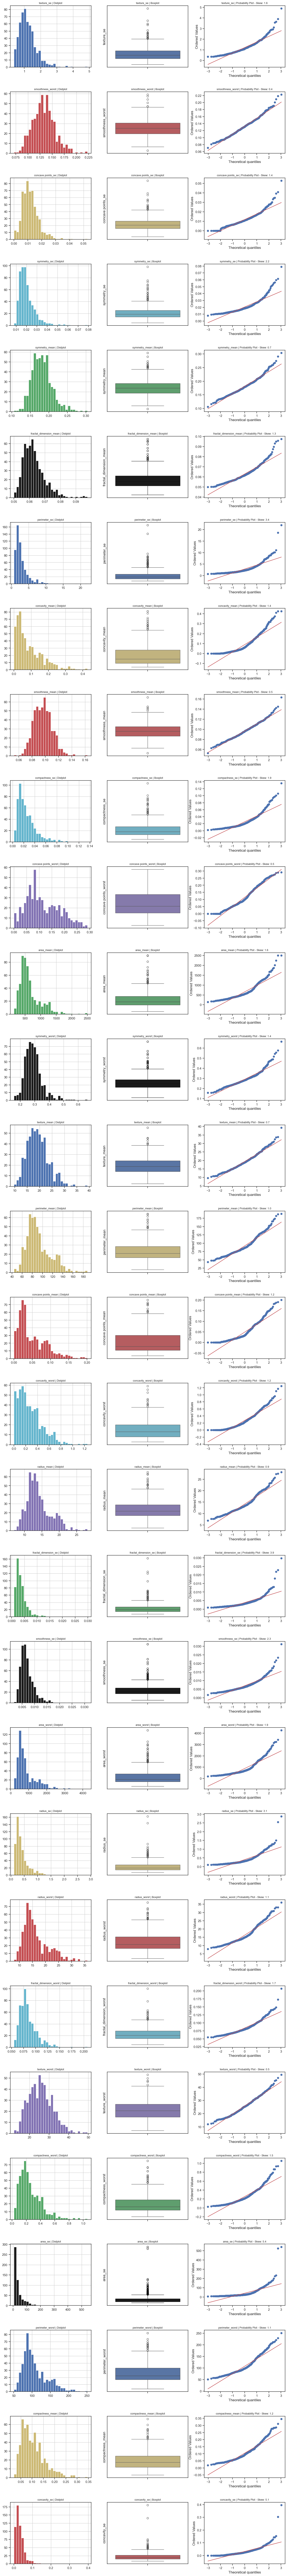

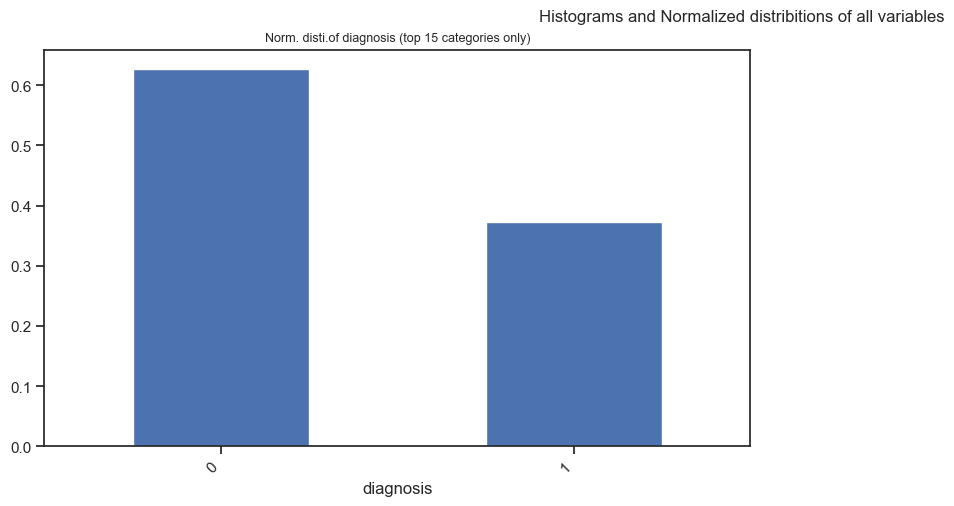

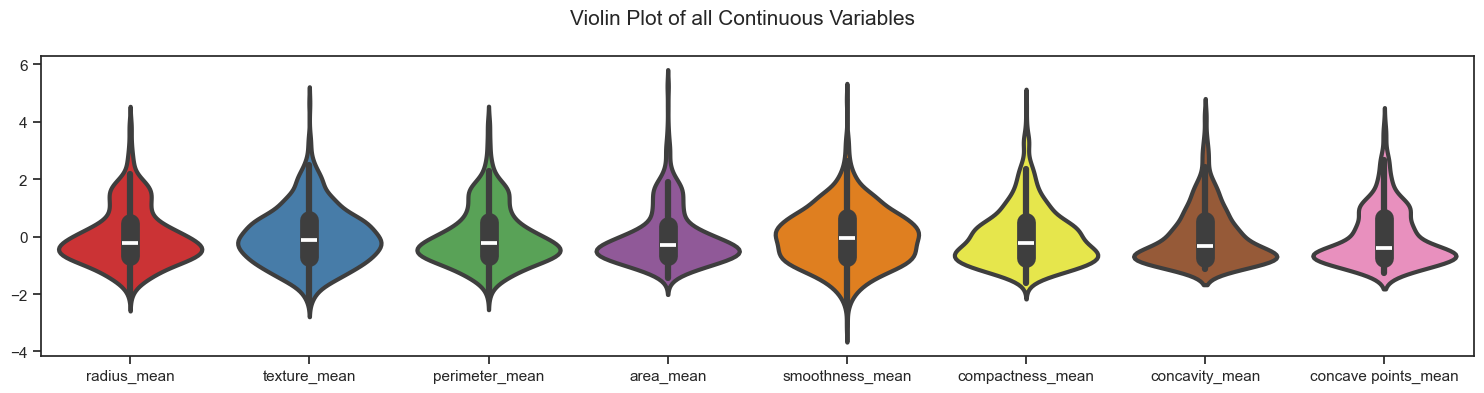

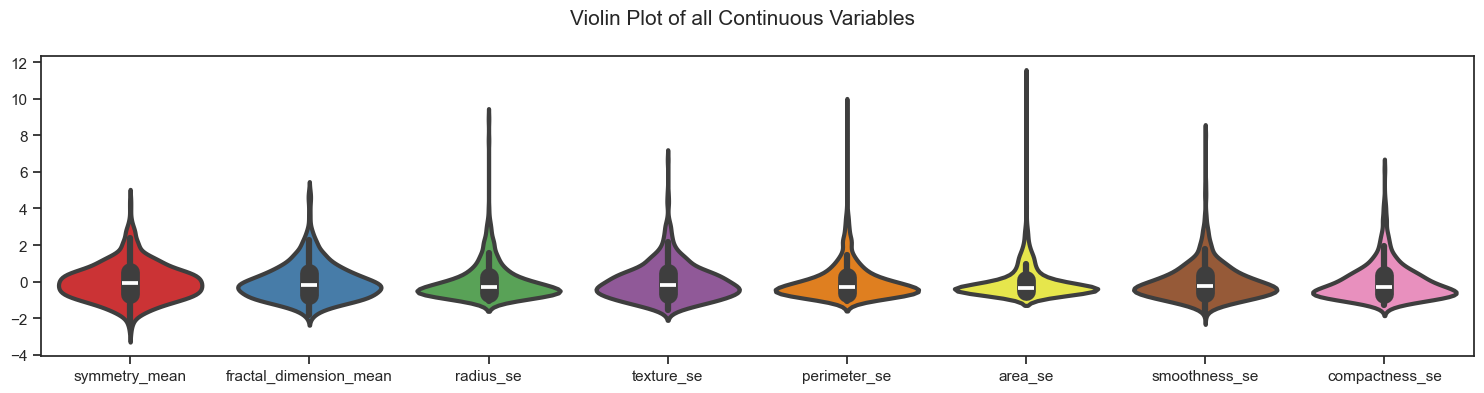

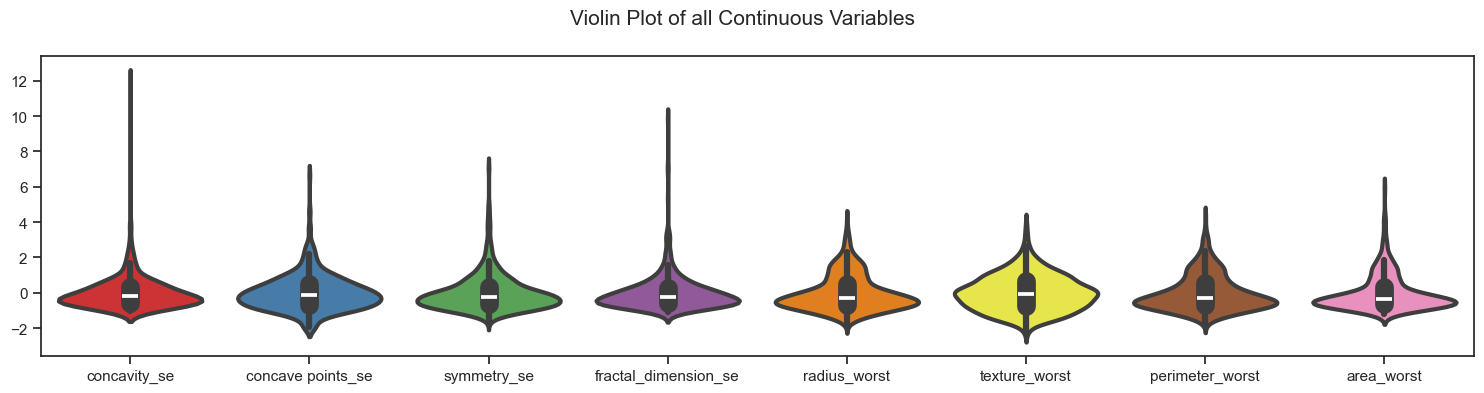

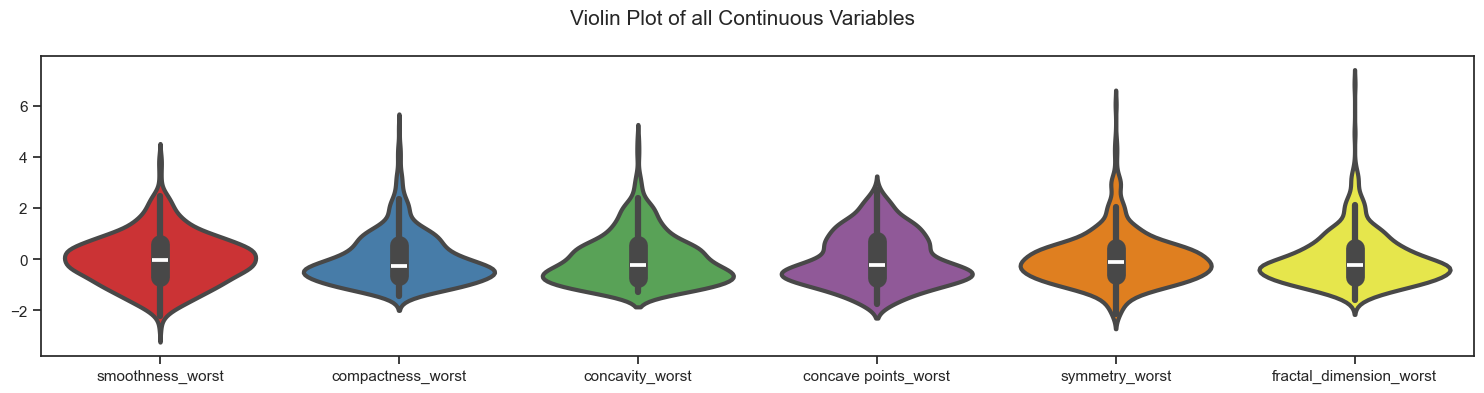

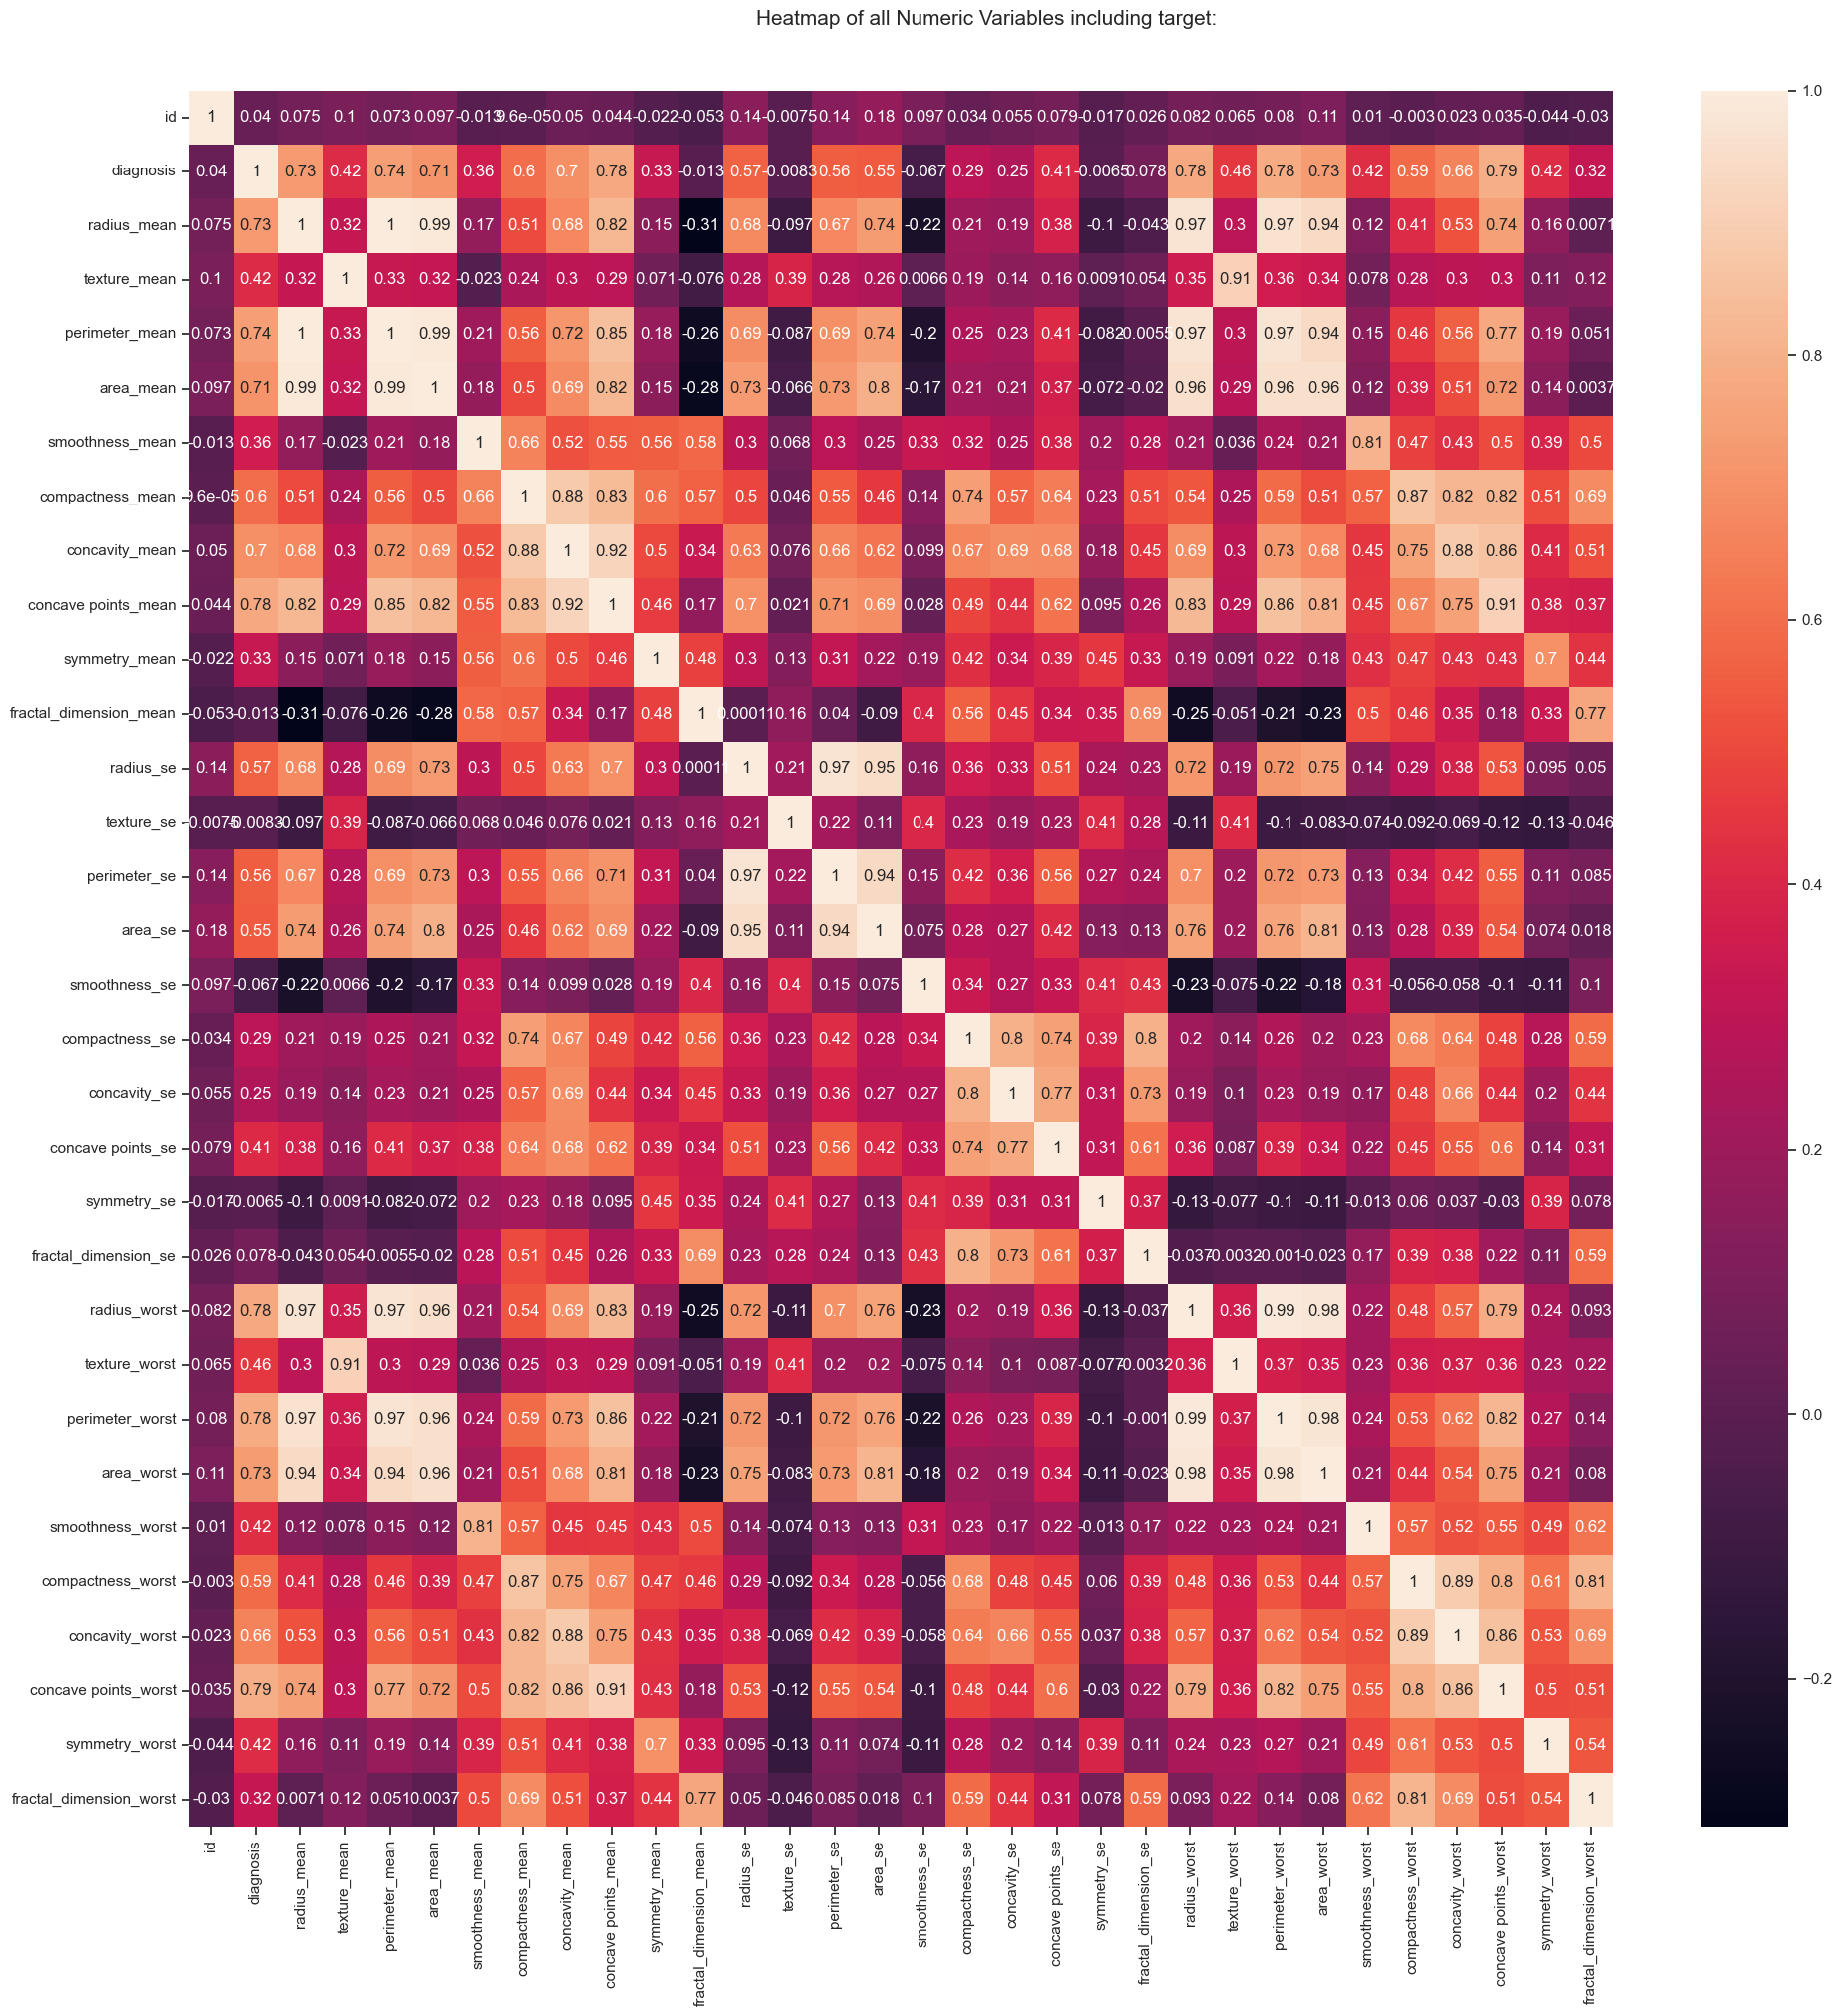

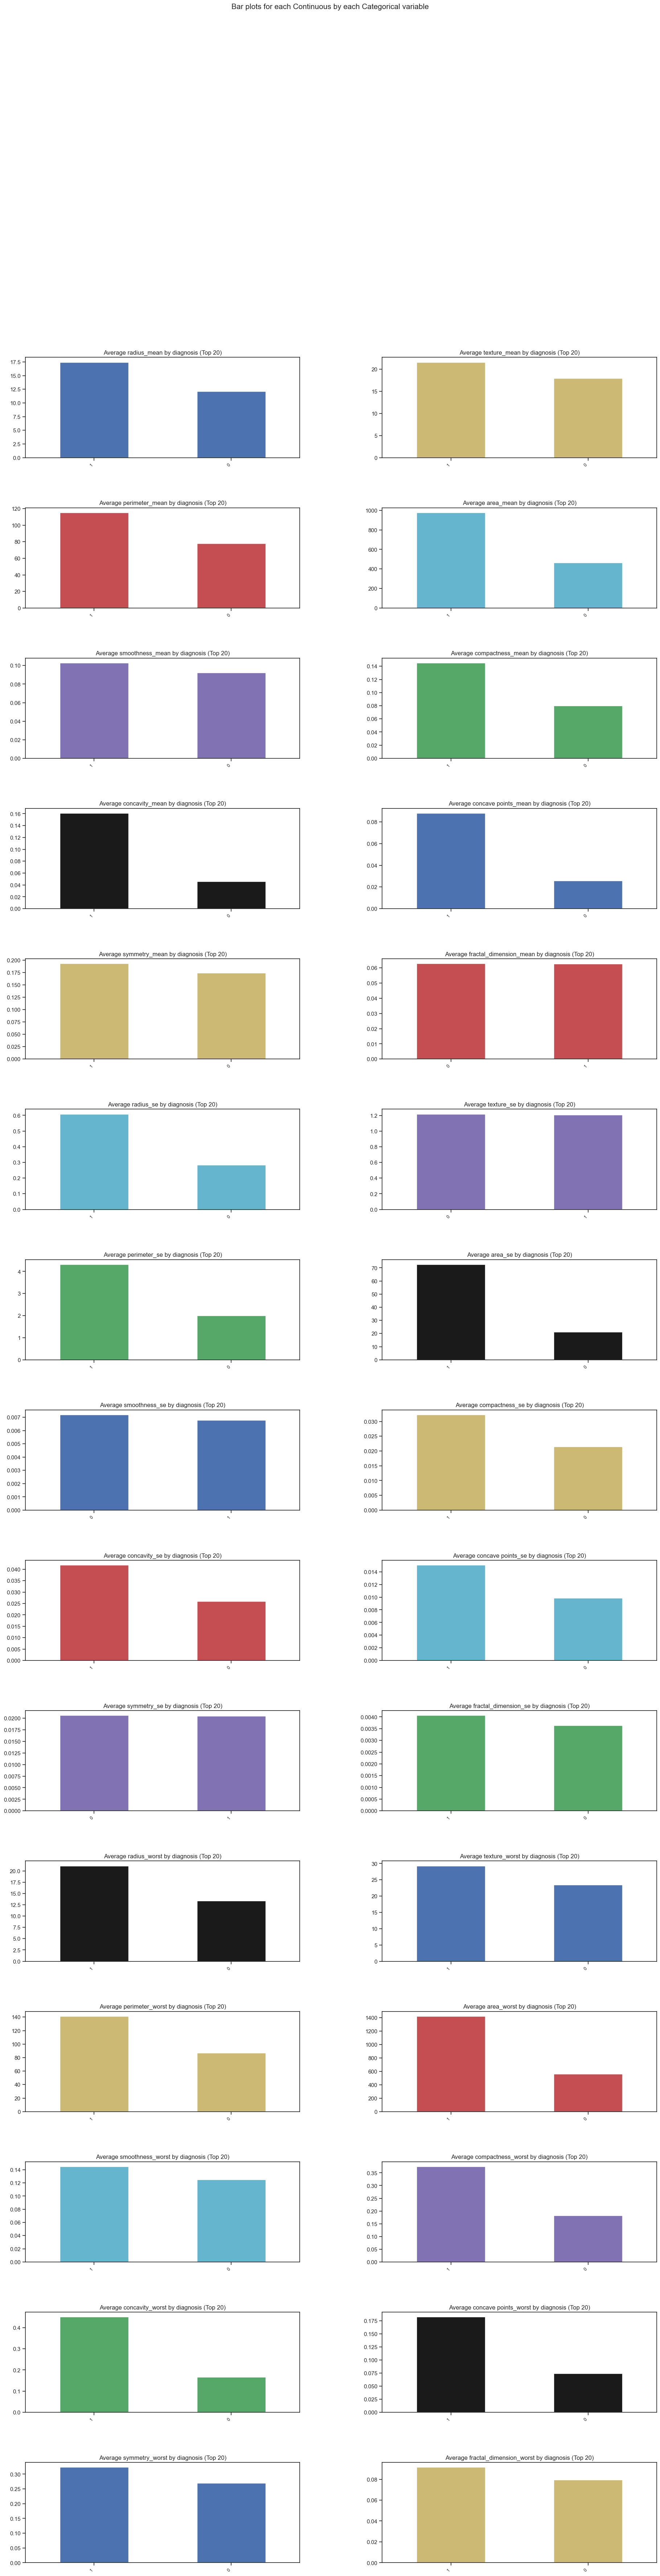

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


id     diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302      1         17.99         10.38         122.80       
1      842517      1         20.57         17.77         132.90       
2    84300903      1         19.69         21.25         130.00       
3    84348301      1         11.42         20.38          77.58       
4    84358402      1         20.29         14.34         135.10       
..        ...        ...          ...           ...             ...   
564    926424      1         21.56         22.39         142.00       
565    926682      1         20.13         28.25         131.20       
566    926954      1         16.60         28.08         108.30       
567    927241      1         20.60         29.33         140.10       
568     92751      0          7.76         24.54          47.92       

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     1001.0        0.11840           0.27760          0.30010      
1     1326.0        0.08474           0.07864          0.08690      
2     1203.0        0.10960           0.15990          0.19740      
3      386.1        0.14250           0.28390          0.24140      
4     1297.0        0.10030           0.13280          0.19800      
..         ...              ...               ...             ...   
564   1479.0        0.11100           0.11590          0.24390      
565   1261.0        0.09780           0.10340          0.14400      
566    858.1        0.08455           0.10230          0.09251      
567   1265.0        0.11780           0.27700          0.35140      
568    181.0        0.05263           0.04362          0.00000      

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0          0.14710           0.2419              0.07871          1.0950     
1          0.07017           0.1812              0.05667          0.5435     
2          0.12790           0.2069              0.05999          0.7456     
3          0.10520           0.2597              0.09744          0.4956     
4          0.10430           0.1809              0.05883          0.7572     
..                   ...            ...                     ...        ...   
564        0.13890           0.1726              0.05623          1.1760     
565        0.09791           0.1752              0.05533          0.7655     
566        0.05302           0.1590              0.05648          0.4564     
567        0.15200           0.2397              0.07016          0.7260     
568        0.00000           0.1587              0.05884          0.3857     

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
0      0.9053        8.589     153.40     0.006399         0.04904      
1      0.7339        3.398      74.08     0.005225         0.01308      
2      0.7869        4.585      94.03     0.006150         0.04006      
3      1.1560        3.445      27.23     0.009110         0.07458      
4      0.7813        5.438      94.44     0.011490         0.02461      
..          ...           ...      ...            ...             ...   
564    1.2560        7.673     158.70     0.010300         0.02891      
565    2.4630        5.203      99.04     0.005769         0.02423      
566    1.0750        3.425      48.55     0.005903         0.03731      
567    1.5950        5.772      86.22     0.006522         0.06158      
568    1.4280        2.548      19.15     0.007189         0.00466      

     concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0       0.05373         0.01587         0.03003          0.006193         
1       0.01860         0.01340         0.01389          0.003532         
2       0.03832         0.02058         0.02250          0.004571         
3       0.05661         0.01867         0.05963          0.009208         
4       0.05688         0.01885         0.01756          0.005115         
..            ...                ...          ...             

In [68]:
!pip install autoviz.AutoViz_Class
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz('/Users/nmglwr/Documents/GitHub/ML_project_medical/df_flat_file.csv')

### Target variable

<Axes: xlabel='diagnosis', ylabel='count'>

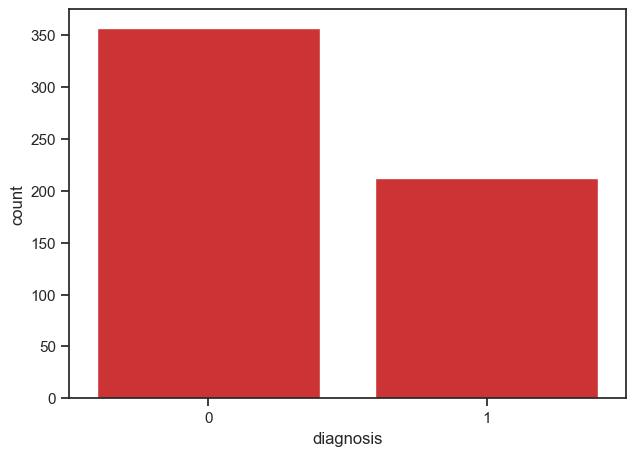

In [73]:
sns.countplot(df, x="diagnosis")

### more figures

In [95]:
cols_to_analyze = df.columns.to_list()[2:]
cols_to_analyze

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

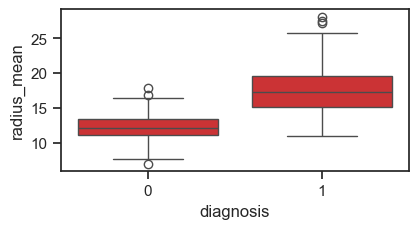

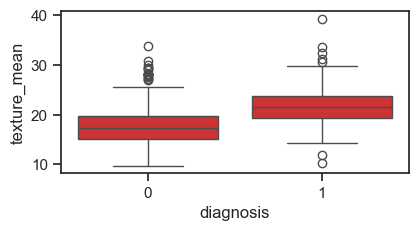

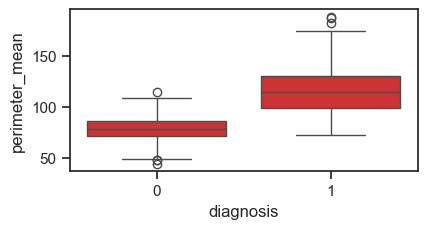

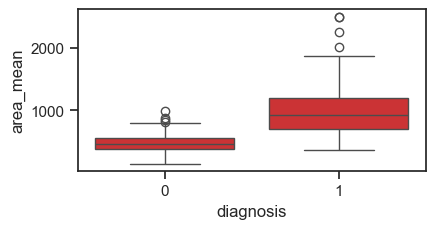

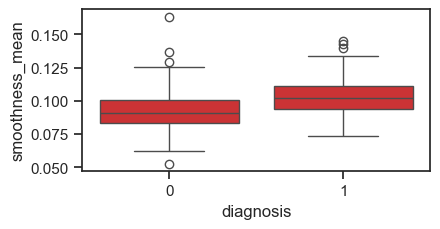

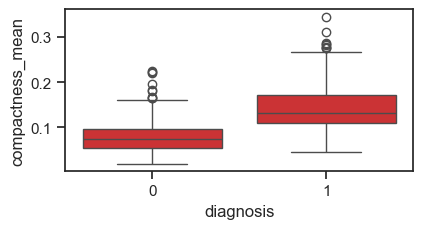

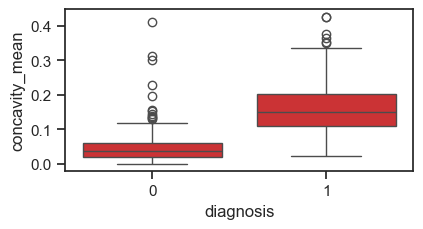

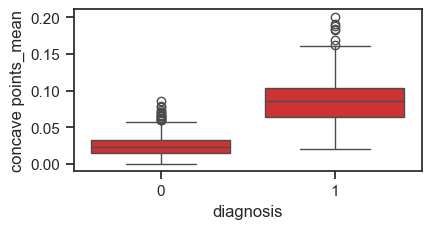

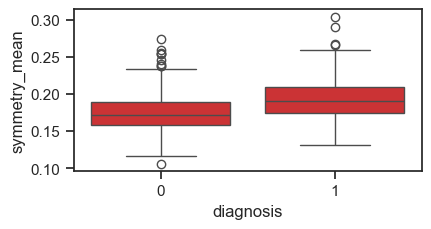

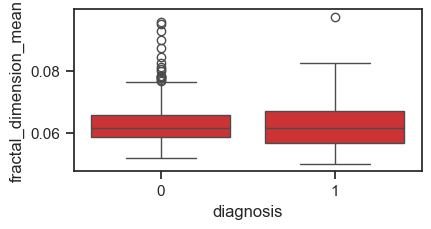

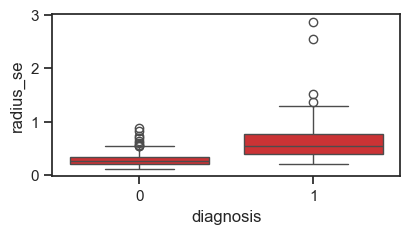

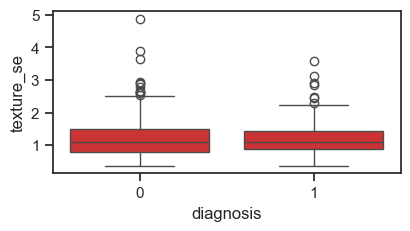

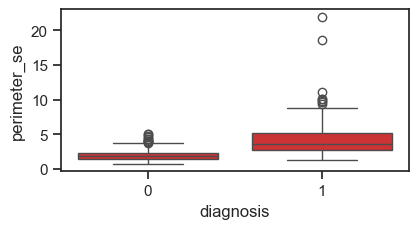

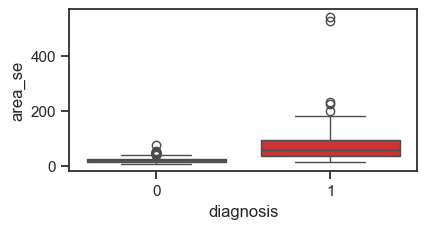

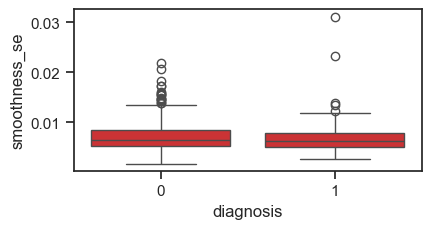

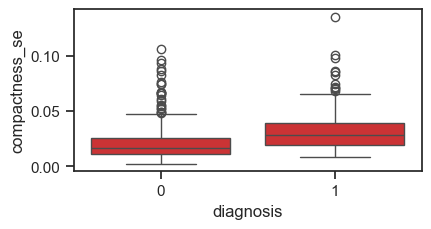

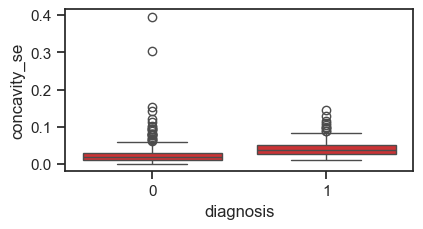

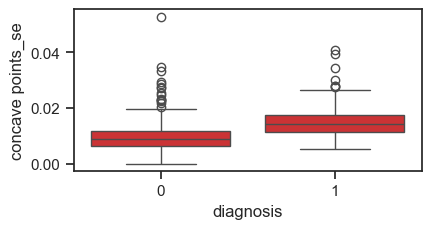

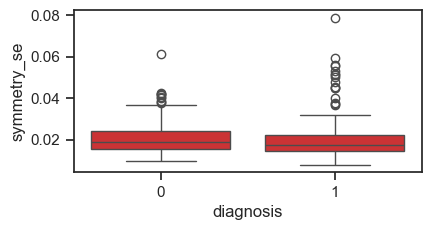

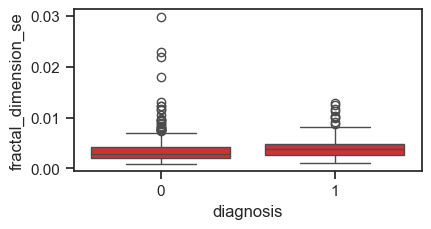

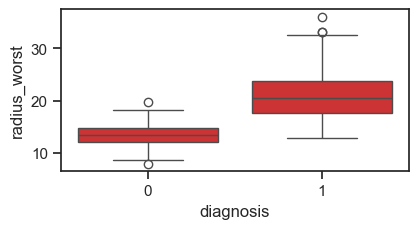

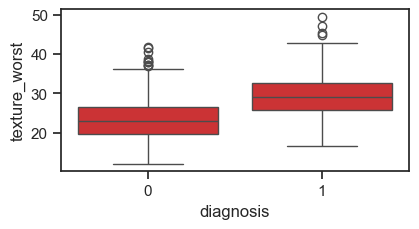

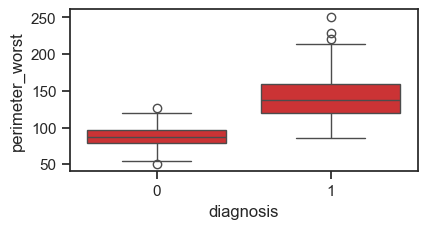

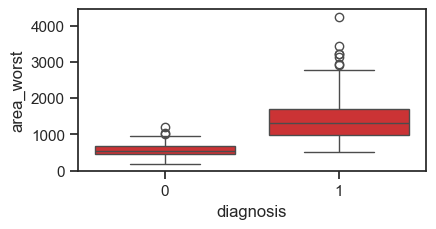

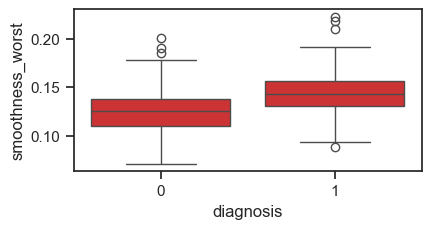

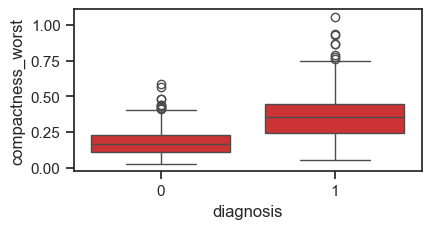

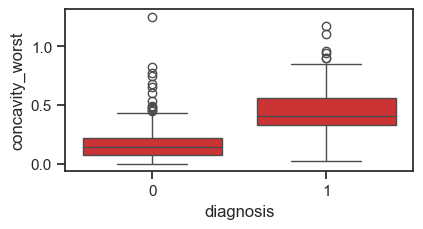

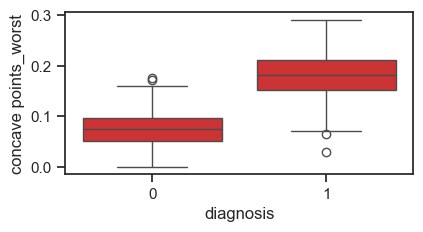

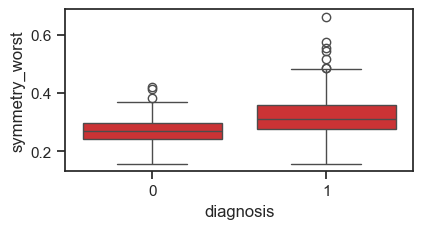

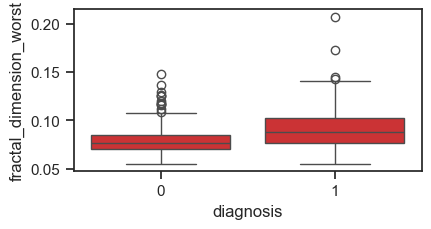

In [97]:
cols_to_analyze = df.columns.to_list()[2:]
for col in cols_to_analyze: 
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=df, x="diagnosis", y=col)

### Skeweness

In [99]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df[cols_to_analyze].skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.map(highlight)

In [101]:
df.select_dtypes(include=['int','float']).corr()

id     diagnosis  radius_mean  texture_mean  \
id                       1.000000  0.039769    0.074626      0.099770     
diagnosis                0.039769  1.000000    0.730029      0.415185     
radius_mean              0.074626  0.730029    1.000000      0.323782     
texture_mean             0.099770  0.415185    0.323782      1.000000     
perimeter_mean           0.073159  0.742636    0.997855      0.329533     
area_mean                0.096893  0.708984    0.987357      0.321086     
smoothness_mean         -0.012968  0.358560    0.170581     -0.023389     
compactness_mean         0.000096  0.596534    0.506124      0.236702     
concavity_mean           0.050080  0.696360    0.676764      0.302418     
concave points_mean      0.044158  0.776614    0.822529      0.293464     
symmetry_mean           -0.022114  0.330499    0.147741      0.071401     
fractal_dimension_mean  -0.052511 -0.012838   -0.311631     -0.076437     
radius_se                0.143048  0.567134    0.679090      0.275869     
texture_se              -0.007526 -0.008303   -0.097317      0.386358     
perimeter_se             0.137331  0.556141    0.674172      0.281673     
area_se                  0.177742  0.548236    0.735864      0.259845     
smoothness_se            0.096781 -0.067016   -0.222600      0.006614     
compactness_se           0.033961  0.292999    0.206000      0.191975     
concavity_se             0.055239  0.253730    0.194204      0.143293     
concave points_se        0.078768  0.408042    0.376169      0.163851     
symmetry_se             -0.017306 -0.006522   -0.104321      0.009127     
fractal_dimension_se     0.025725  0.077972   -0.042641      0.054458     
radius_worst             0.082405  0.776454    0.969539      0.352573     
texture_worst            0.064720  0.456903    0.297008      0.912045     
perimeter_worst          0.079986  0.782914    0.965137      0.358040     
area_worst               0.107187  0.733825    0.941082      0.343546     
smoothness_worst         0.010338  0.421465    0.119616      0.077503     
compactness_worst       -0.002968  0.590998    0.413463      0.277830     
concavity_worst          0.023203  0.659610    0.526911      0.301025     
concave points_worst     0.035174  0.793566    0.744214      0.295316     
symmetry_worst          -0.044224  0.416294    0.163953      0.105008     
fractal_dimension_worst -0.029866  0.323872    0.007066      0.119205     

                         perimeter_mean  area_mean  smoothness_mean  \
id                          0.073159     0.096893     -0.012968       
diagnosis                   0.742636     0.708984      0.358560       
radius_mean                 0.997855     0.987357      0.170581       
texture_mean                0.329533     0.321086     -0.023389       
perimeter_mean              1.000000     0.986507      0.207278       
area_mean                   0.986507     1.000000      0.177028       
smoothness_mean             0.207278     0.177028      1.000000       
compactness_mean            0.556936     0.498502      0.659123       
concavity_mean              0.716136     0.685983      0.521984       
concave points_mean         0.850977     0.823269      0.553695       
symmetry_mean               0.183027     0.151293      0.557775       
fractal_dimension_mean     -0.261477    -0.283110      0.584792       
radius_se                   0.691765     0.732562      0.301467       
texture_se                 -0.086761    -0.066280      0.068406       
perimeter_se                0.693135     0.726628      0.296092       
area_se                     0.744983     0.800086      0.246552       
smoothness_se              -0.202694    -0.166777      0.332375       
compactness_se              0.250744     0.212583      0.318943       
concavity_se                0.228082     0.207660      0.248396       
concave points_se           0.407217     0.372320      0.380676       
symmetry_se                -0.081629    -0.072497      0.2007

<Axes: >

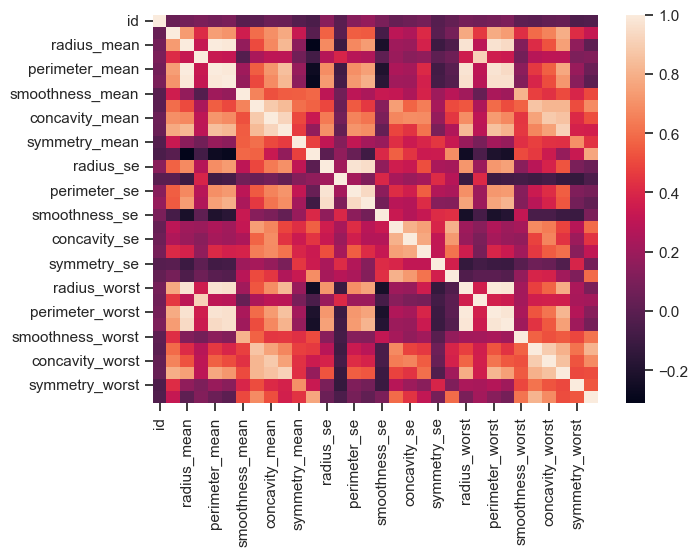

In [103]:
sns.heatmap(df.select_dtypes(include=['int','float']).corr())

# Data cleaning

## Outliers

In [109]:
df = pd.read_pickle(r"/Users/nmglwr/Documents/GitHub/ML_project_medical/df_flat_file.pkl")

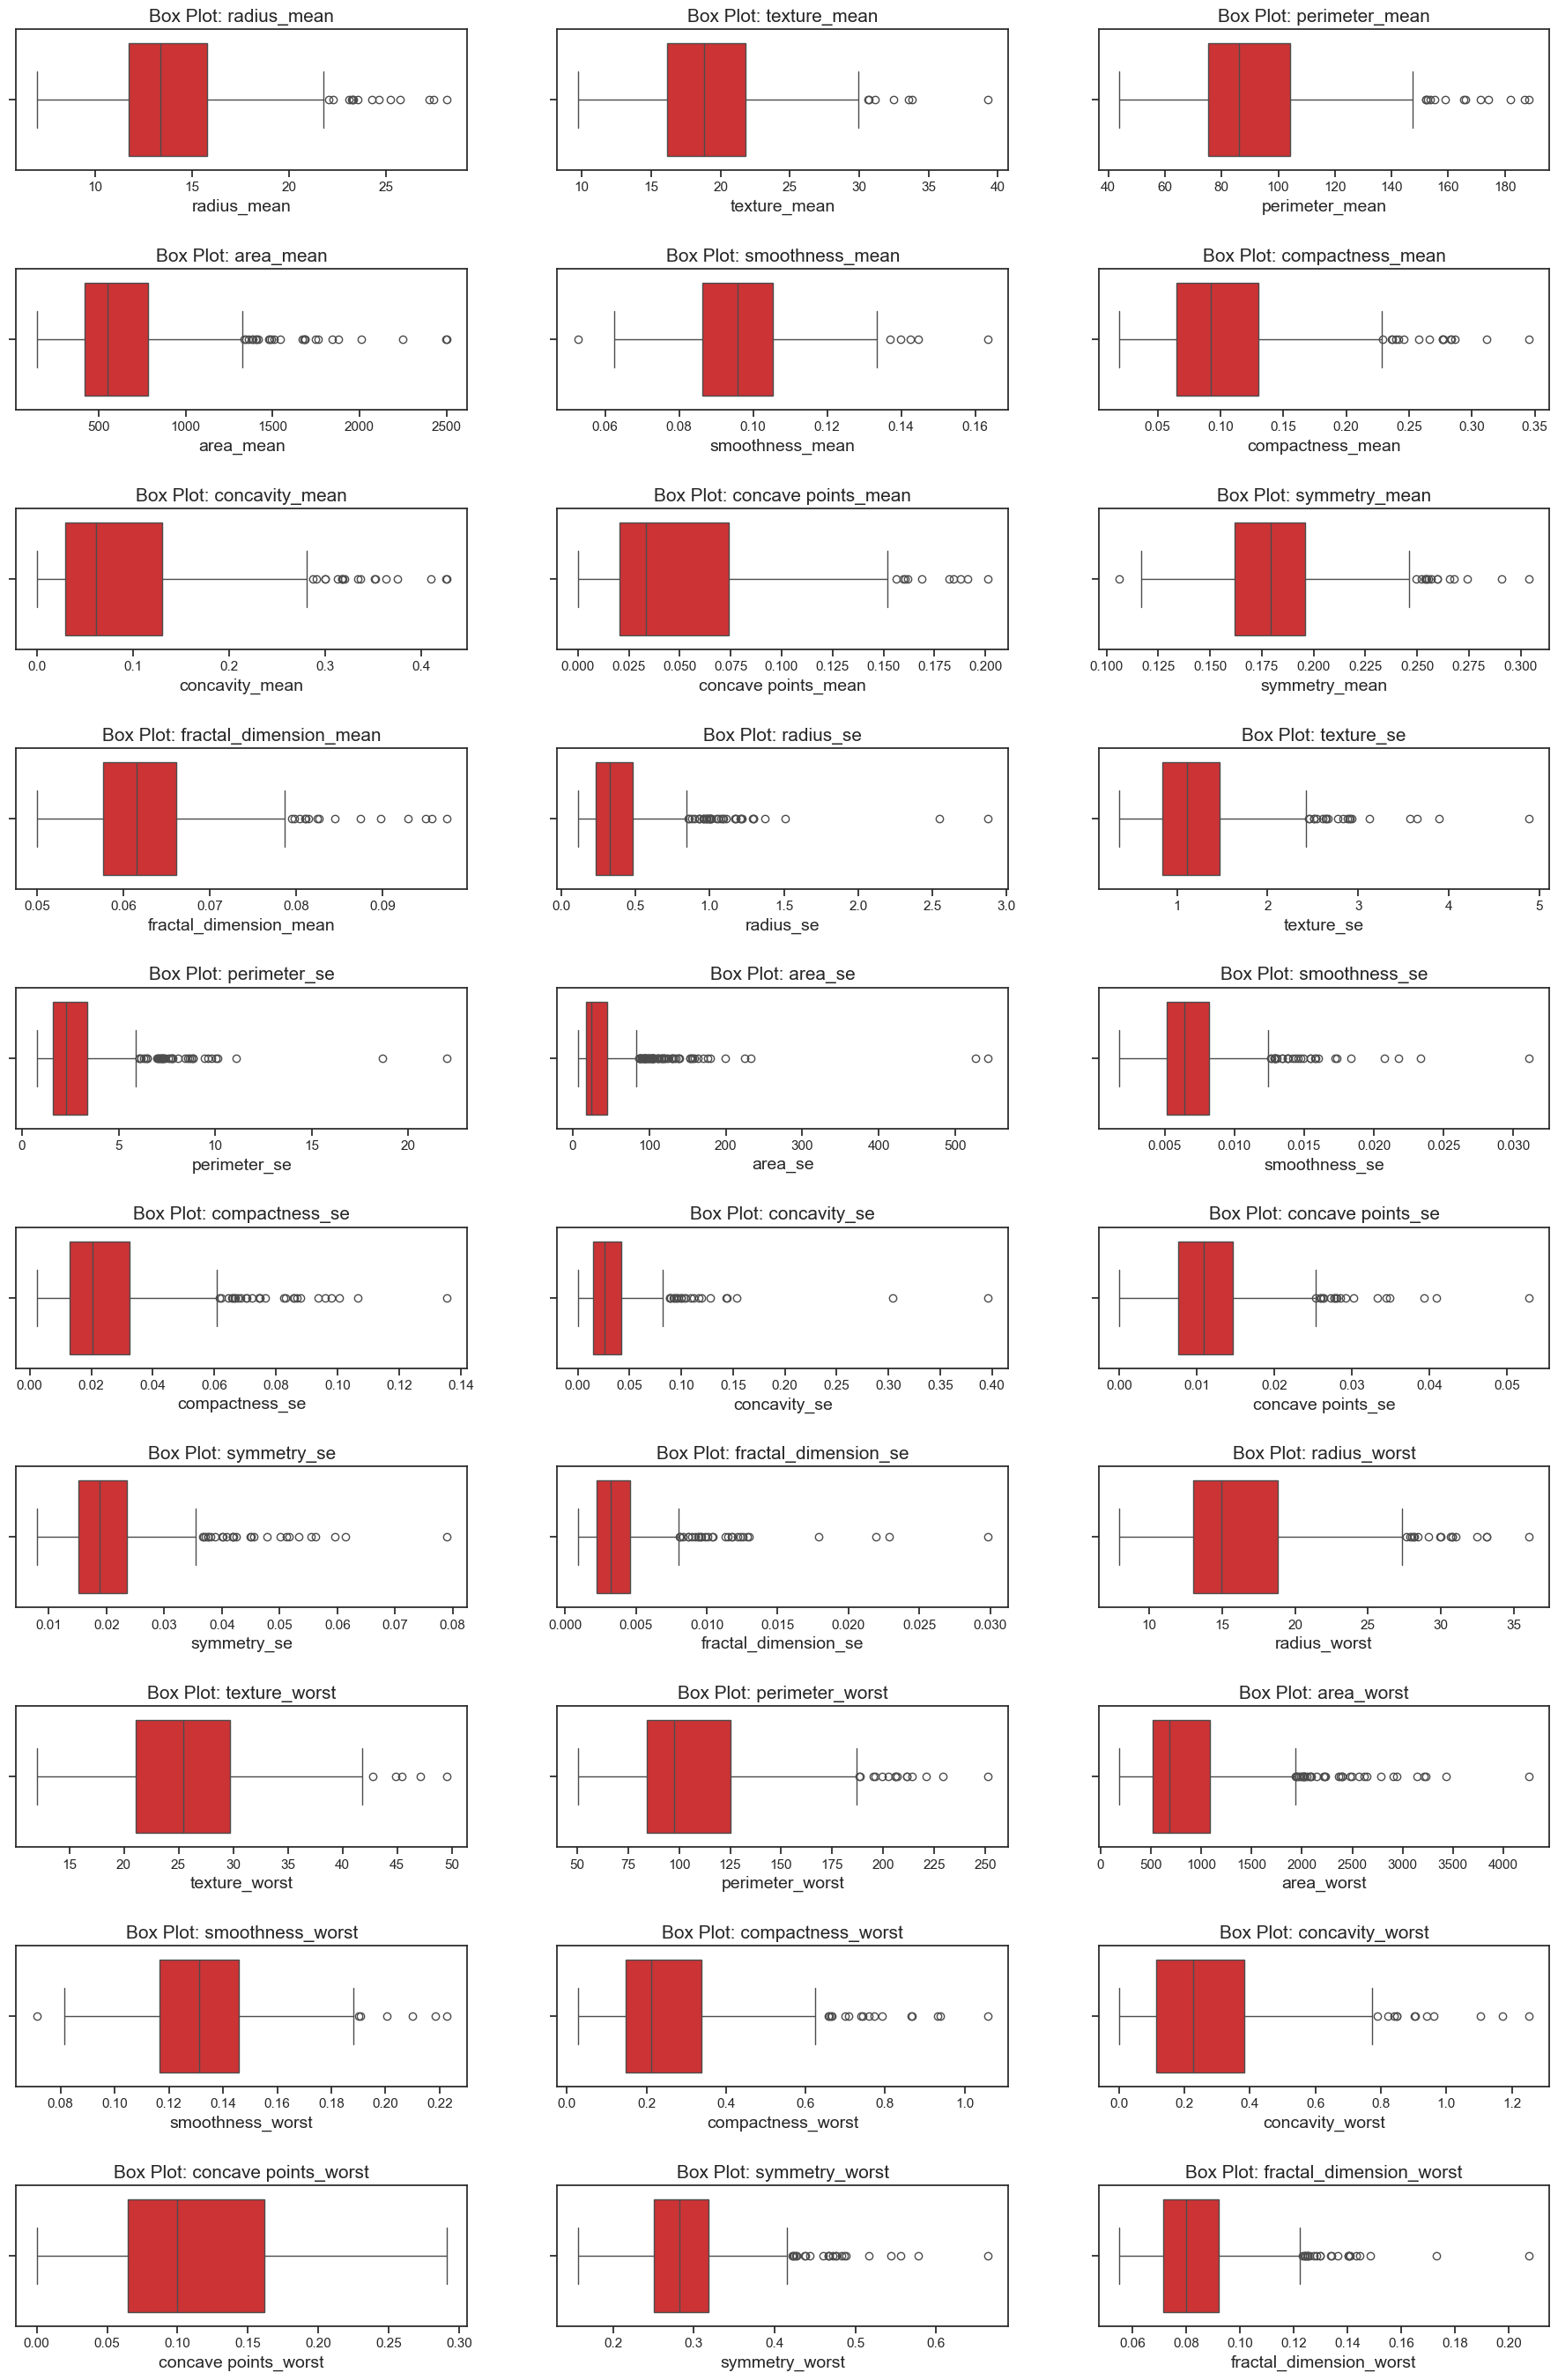

In [113]:
cols_to_analyze = df.columns.to_list()[2:]
# Define the function to plot box plots for each numeric column
def outliers_boxplot(df):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(df.columns):
        ax = plt.subplot(60, 3, i + 1)
        sns.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()

outliers_boxplot(df[cols_to_analyze])

In [115]:
# Function to identify and treat outliers using IQR
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
    return df_outliers

In [117]:
# Apply the outlier treatment function to numeric columns
outliers_df = treat_outliers(df, cols_to_analyze)
outliers_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         0             0              0            0             0          
1         0             0              0            0             0          
2         0             0              0            0             0          
3         0             0              0            0             1          
4         0             0              0            0             0          
..           ...           ...             ...        ...              ...   
564       0             0              0            1             0          
565       0             0              0            0             0          
566       0             0              0            0             0          
567       0             0              0            0             0          
568       0             0              0            0             1          

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            1                1                 0                 0         
1            0                0                 0                 0         
2            0                0                 0                 0         
3            1                0                 0                 1         
4            0                0                 0                 0         
..                ...             ...                  ...            ...   
564          0                0                 0                 0         
565          0                0                 0                 0         
566          0                0                 0                 0         
567          1                1                 0                 0         
568          0                0                 0                 0         

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0               0                1           0            1          1      
1               0                0           0            0          0      
2               0                0           0            0          1      
3               1                0           0            0          0      
4               0                0           0            0          1      
..                      ...        ...         ...           ...      ...   
564             0                1           0            1          1      
565             0                0           1            0          1      
566             0                0           0            0          0      
567             0                0           0            0          1      
568             0                0           0            0          0      

     smoothness_se  compactness_se  concavity_se  concave points_se  \
0          0               0              0               0           
1          0               0              0               0           
2          0               0              0               0           
3          0               1              0               0           
4          0               0              0               0           
..             ...             ...           ...                ...   
564        0               0              0               0           
565        0               0              0               0           
566        0               0              0               0           
567        0               1              0               0           
568        0               0              0               0           

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0         0                 0                 0             0         
1         0                 0                 0             0         
2         0                 0                 0             0         
3         1                 1                 0             0         
4         

In [119]:
#Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
out_df

Empty DataFrame
Columns: [feature, outliers_cnt, distribution_changed, correlation_changed]
Index: []

In [123]:
# Checking distribution and correlation changes

from scipy.stats import zscore, ks_2samp

for col in cols_to_analyze:
    out = df[col]
    non_out = df[col][outliers_df[col] == 0]
    cor_out = df['diagnosis']
    cor_non_out = df['diagnosis'][outliers_df[col] == 0]
    
    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)

In [125]:
out_df

feature          outliers_cnt distribution_changed  \
0               radius_mean      14                -            
1              texture_mean       7                -            
2            perimeter_mean      13                -            
3                 area_mean      25                -            
4           smoothness_mean       6                -            
5          compactness_mean      16                -            
6            concavity_mean      18                -            
7       concave points_mean      10                -            
8             symmetry_mean      15                -            
9    fractal_dimension_mean      15                -            
10                radius_se      38                -            
11               texture_se      20                -            
12             perimeter_se      38                -            
13                  area_se      65                +            
14            smoothness_se      30                -            
15           compactness_se      28                -            
16             concavity_se      22                -            
17        concave points_se      19                -            
18              symmetry_se      27                -            
19     fractal_dimension_se      28                -            
20             radius_worst      17                -            
21            texture_worst       5                -            
22          perimeter_worst      15                -            
23               area_worst      35                -            
24         smoothness_worst       7                -            
25        compactness_worst      16                -            
26          concavity_worst      12                -            
27     concave points_worst       0                -            
28           symmetry_worst      23                -            
29  fractal_dimension_worst      24                -            

   correlation_changed  
0            -          
1            -          
2            -          
3            -          
4            -          
5            -          
6            +          
7            -          
8            -          
9            -          
10           -          
11           -          
12           -          
13           +          
14           +          
15           +          
16           +          
17           +          
18           +          
19           +          
20           -          
21           -          
22           -          
23           +          
24           -          
25           -          
26           -          
27           -          
28           +          
29           -

In [127]:
# Filter features where only distribution changes but not correlation
out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')
to_drop = out_df[out_df['drop'] == 'yes']['feature']
to_drop

Series([], Name: feature, dtype: object)

In [129]:
# Remove outliers
df_cleaned = df.copy()
for col in to_drop:
    df_cleaned.loc[outliers_df[col] == 1, col] = np.nan

In [131]:
# Save cleaned data
df_cleaned.to_pickle('df_cleaned.pkl')
df_cleaned.to_csv('df_cleaned.csv')

## Missing values

In [134]:
df = pd.read_pickle(r"/Users/nmglwr/Documents/GitHub/ML_project_medical/df_cleaned.pkl")

<Axes: >

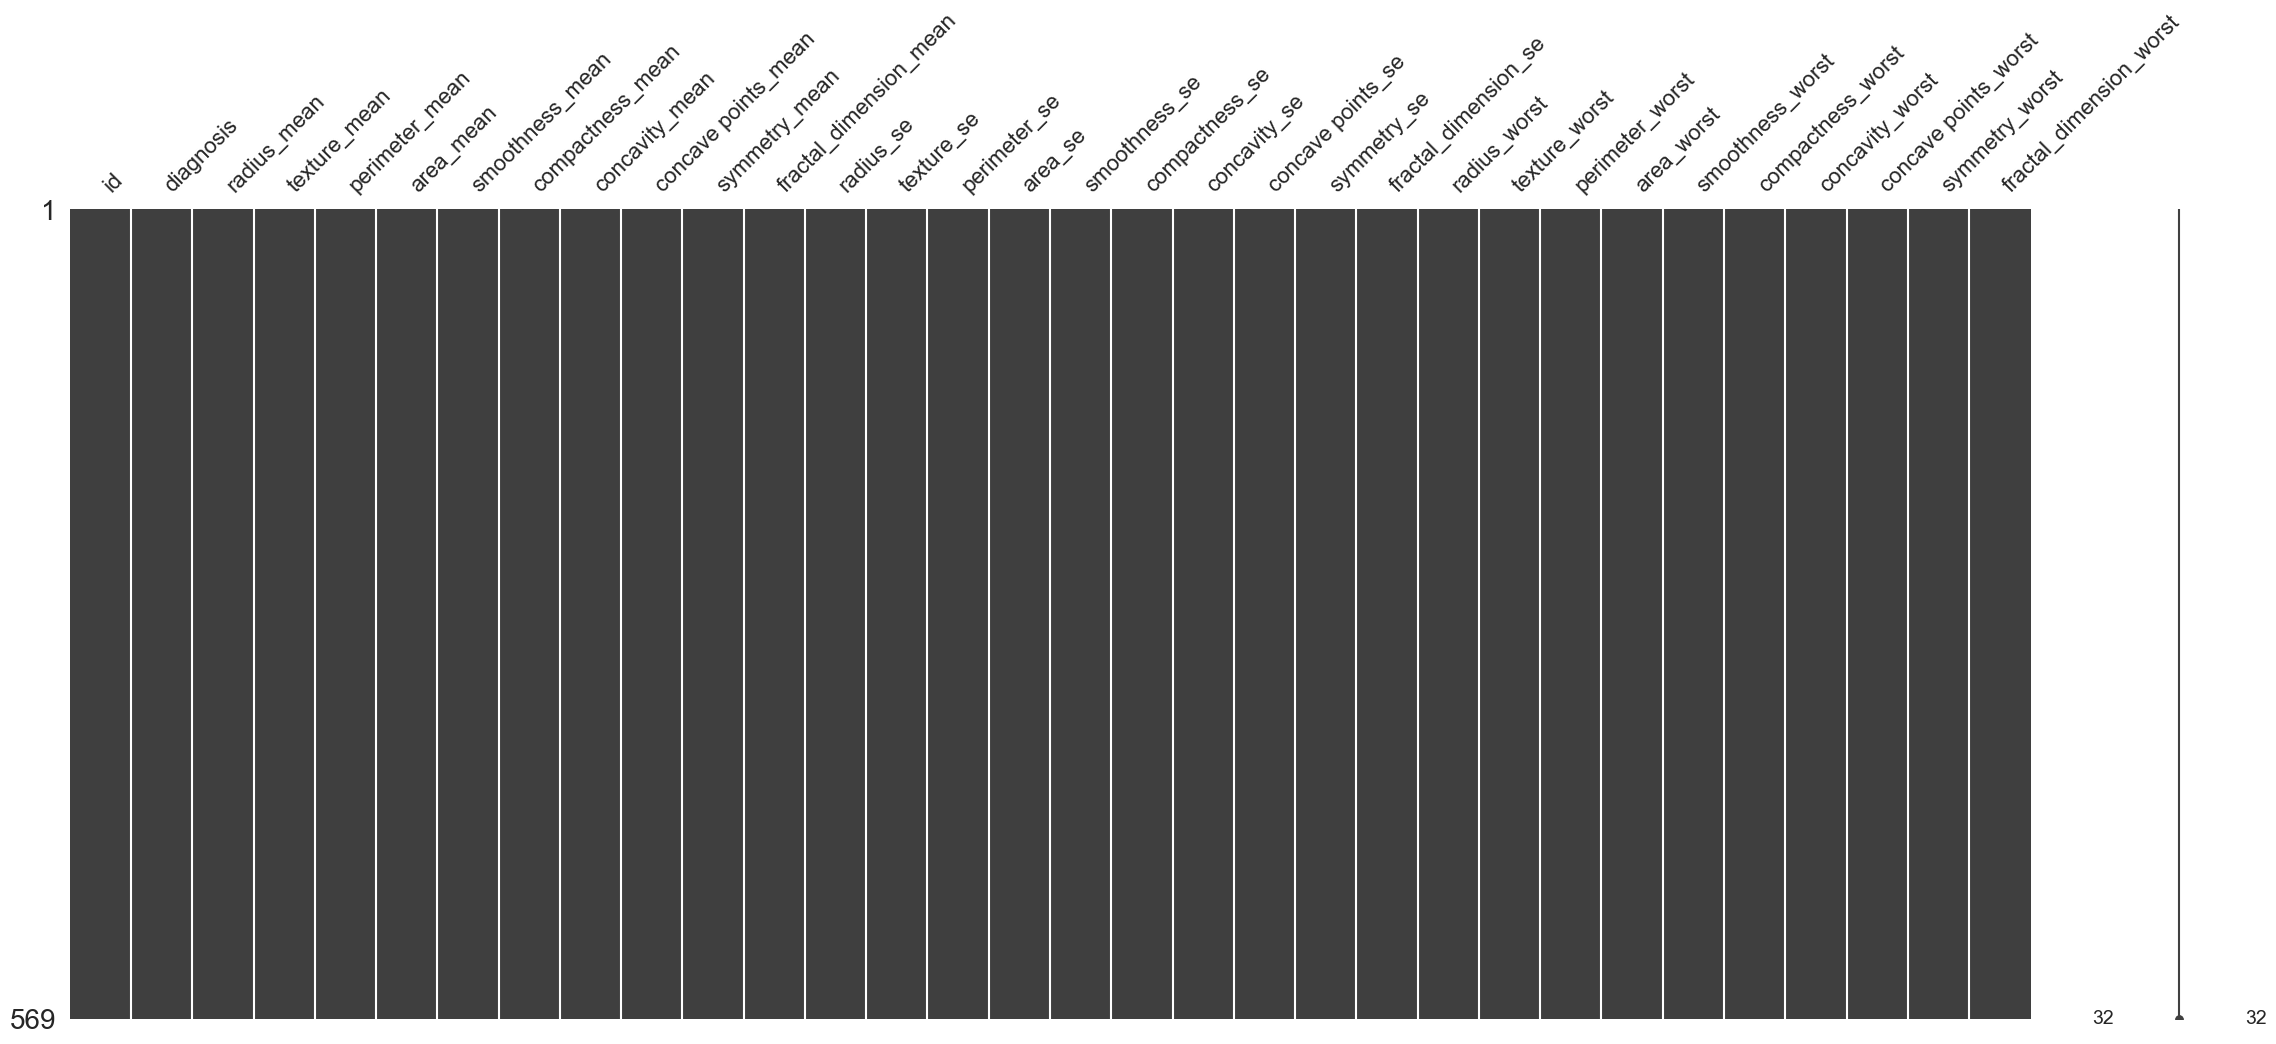

In [136]:
!pip install missingno
import missingno as msno
msno.matrix(df_cleaned)

No missing values!
No need for imputation!

## Feature engineering

For now I am not doing it...

## Model selection

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import xgboost as xgb
import sklearn.metrics as metrics 

In [145]:
df = pd.read_pickle(r"/Users/nmglwr/Documents/GitHub/ML_project_medical/df_cleaned.pkl")

In [147]:
X = df.loc[:,df.columns != 'diagnosis']
y = df['diagnosis']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
def classificationMetrics(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'Log-loss': metrics.log_loss(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
    return res

In [153]:
Classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Neighbors Regressor': KNeighborsClassifier()
}

<Figure size 400x200 with 0 Axes>

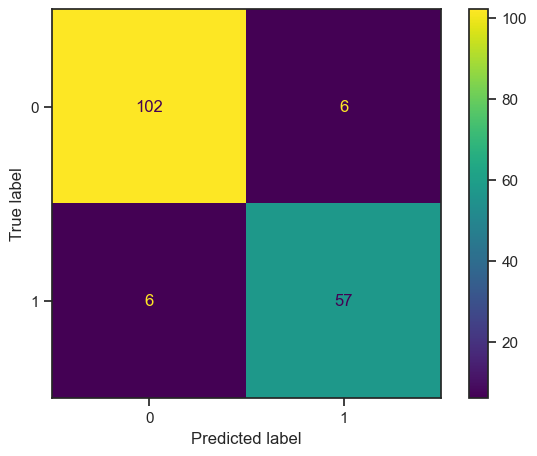

<Figure size 400x200 with 0 Axes>

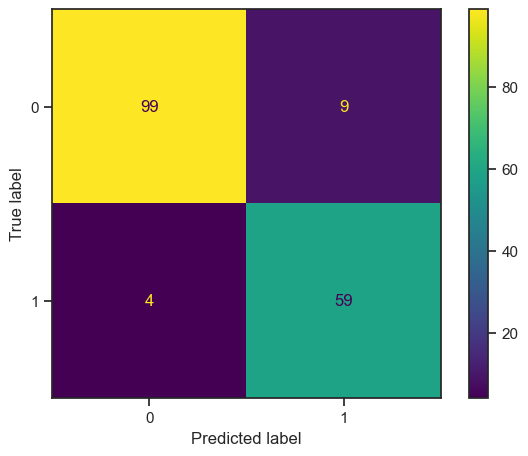

<Figure size 400x200 with 0 Axes>

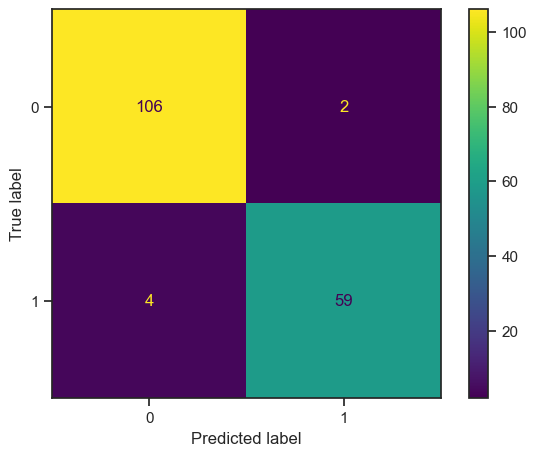

<Figure size 400x200 with 0 Axes>

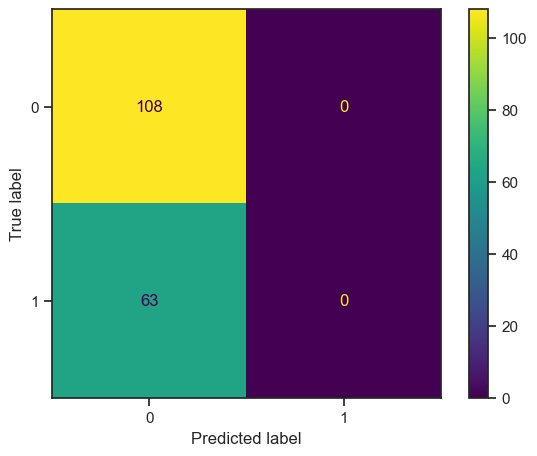

<Figure size 400x200 with 0 Axes>

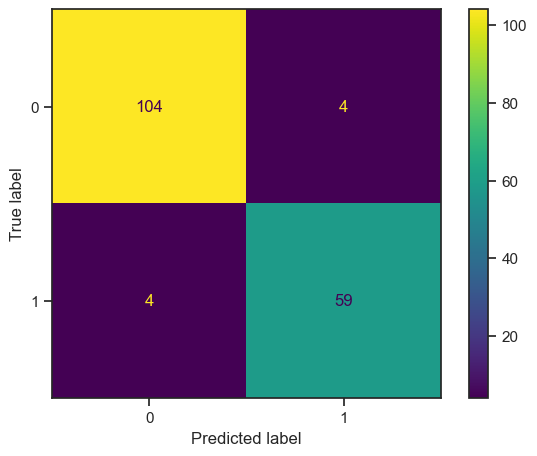

<Figure size 400x200 with 0 Axes>

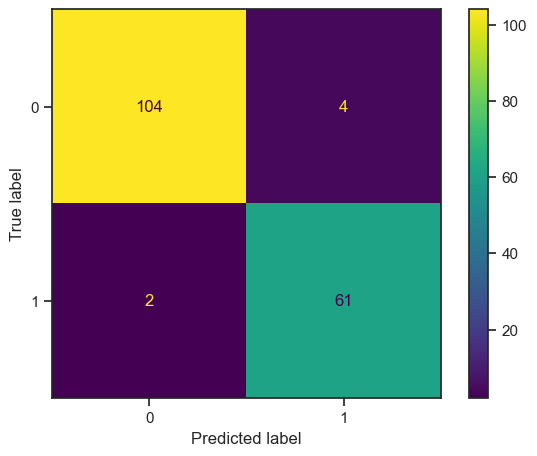

<Figure size 400x200 with 0 Axes>

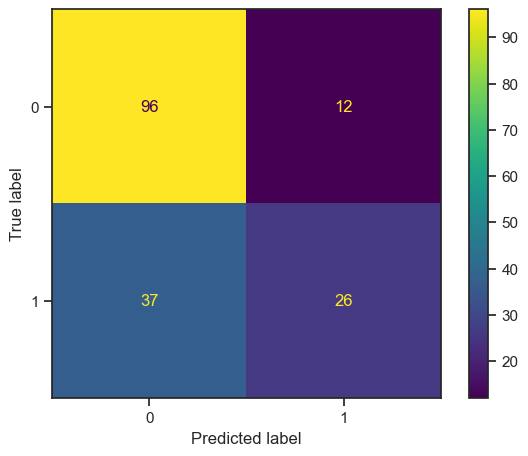

Accuracy  Precision   Recall   f1-score  Log-loss      AUC    \
0  0.929825  0.904762   0.904762  0.904762   2.529379  0.924603   
1  0.923977  0.867647   0.936508  0.900763   2.740161  0.926587   
2  0.964912  0.967213   0.936508  0.951613   1.264690  0.958995   
3  0.631579  0.000000   0.000000  0.000000  13.279241  0.500000   
4  0.953216  0.936508   0.936508  0.936508   1.686253  0.949735   
5  0.964912  0.938462   0.968254  0.953125   1.264690  0.965608   
6  0.713450  0.684211   0.412698  0.514851  10.328298  0.650794   

            Model               Confusion_Matrix    
0        Logistic Regression   [[102, 6], [6, 57]]  
1   Decision Tree Classifier    [[99, 9], [4, 59]]  
2              Random Forest   [[106, 2], [4, 59]]  
3  Support Vector Classifier   [[108, 0], [63, 0]]  
4          Gradient Boosting   [[104, 4], [4, 59]]  
5                   AdaBoost   [[104, 4], [2, 61]]  
6      K-Neighbors Regressor  [[96, 12], [37, 26]]

In [181]:
results = []

for name, model in Classification_models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    metrics_results = classificationMetrics(y_test, y_pred)  # Get metrics
    metrics_results['Model'] = name  # Add model name to the results
    cm = confusion_matrix(y_test, y_pred)
    metrics_results['Confusion_Matrix'] = cm
    results.append(metrics_results)  # Append the results to the list
    #print(f"Confusion Matrix for {name}:")
    #print(cm)
    #print("\n" + "="*50 + "\n")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
    plt.figure(figsize=(4, 2))
    cm_display.plot()
    plt.show()
    

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)
results_df

I choose the AdaBoost model because the FN and FP is the lowest

### Fine tuning

In [191]:
from sklearn.model_selection import GridSearchCV

In [205]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}


In [207]:
grid = GridSearchCV(AdaBoostClassifier(),param_grid,refit=True,verbose=3)

In [209]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.950 total time=   0.1s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.912 total time=   0.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.912 total time=   0.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.937 total time=   0.1s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.924 total time=   0.1s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.950 total time=   0.1s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.925 total time=   0.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.912 total time=   0.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.937 total time=   0.1s
[CV 5/5] END algorithm=SAMME, learning_rate

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

In [227]:
best_params = grid.best_params_

In [213]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100)

In [215]:
grid_predictions = grid.predict(X_test)

In [217]:
print(confusion_matrix(y_test,grid_predictions))

[[105   3]
 [  2  61]]


In [219]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<Figure size 400x200 with 0 Axes>

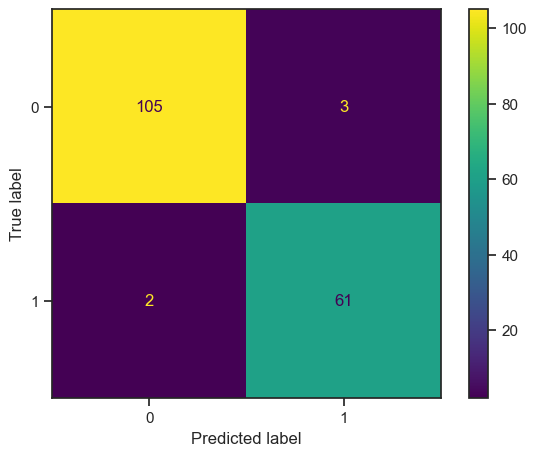

Accuracy  Precision   Recall   f1-score  Log-loss     AUC    \
0   0.97076  0.953125   0.968254   0.96063  1.053908  0.970238   

          Model            Confusion_Matrix    
0  K-Neighbors Regressor  [[105, 3], [2, 61]]

In [235]:
model = AdaBoostClassifier(**best_params)
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)  # Make predictions
final_results = []
metrics_results = classificationMetrics(y_test, y_pred)  # Get metrics
metrics_results['Model'] = name  # Add model name to the results
cm = confusion_matrix(y_test, y_pred)
metrics_results['Confusion_Matrix'] = cm
final_results.append(metrics_results)  # Append the results to the list
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.figure(figsize=(4, 2))
cm_display.plot()
plt.show()

results_df = pd.DataFrame(final_results)
results_df